## Analysis for predicting the Salary on the basis of Past Experience 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
df=pd.read_csv('Salary_Data.csv')

In [2]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

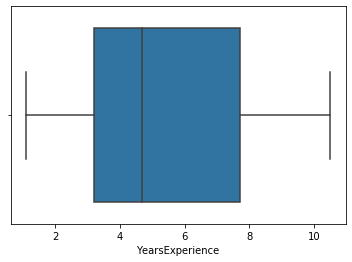

In [5]:
sns.boxplot(df['YearsExperience'])

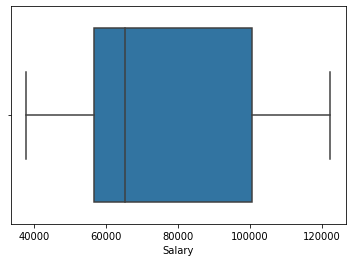

In [6]:
sns.boxplot(df['Salary'])

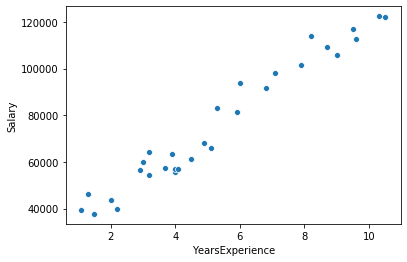

In [7]:
sns.scatterplot(x='YearsExperience',y='Salary',data=df)

In [8]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


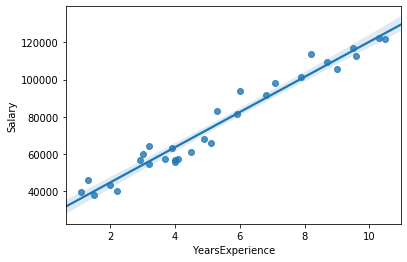

In [9]:
sns.regplot(x='YearsExperience',y='Salary',data=df)

In [10]:
## independent variable 
x=df[['YearsExperience']]

In [11]:
## dependent variable 
y=df[['Salary']]


In [12]:
## command for dividing the data into test and training data 
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=2/3,random_state=100)
## type 'train size'=2/3 or .75 and whenever we run this command, every time it will select 2/3 data randomly ie. data output won't be same
## but we type 'random_state=100', it will always give same list of data.

In [14]:
x_train

,YearsExperience
22,7.9
11,4.0
4,2.2
29,10.5
0,1.1
1,1.3
18,5.9
14,4.5
19,6.0
21,7.1


In [15]:
from sklearn.linear_model import LinearRegression
#created an instance of 'LinearRegression'class
model=LinearRegression()

In [16]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

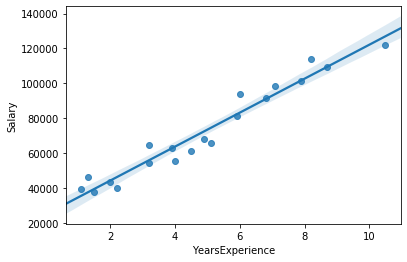

In [17]:
sns.regplot(x_train['YearsExperience'],y_train['Salary'])

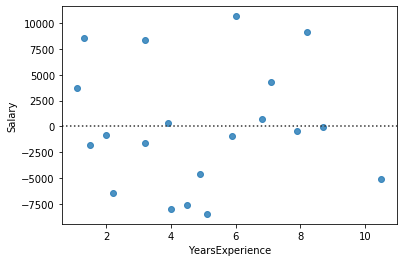

In [18]:
sns.residplot(x_train['YearsExperience'],y_train['Salary'])

In [19]:
model.intercept_

array([24976.50115274])

In [20]:
model.coef_

array([[9713.02017291]])

In [21]:
## prediction model 

## y=24976.50115274+9713.02017291*x

## predicted salary =24976.50115274+9713.02017291*('YearsExperience')

In [22]:
## Using test data 
y_pred=model.predict(x_test)

In [23]:
y_pred

array([[ 60914.67579251],
       [117250.19279539],
       [125020.60893372],
       [ 64799.88386167],
       [ 53144.25965418],
       [ 63828.58184438],
       [118221.49481268],
       [112393.68270893],
       [ 54115.56167147],
       [ 76455.50806916]])

In [24]:
x_test

,YearsExperience
9,3.7
26,9.5
28,10.3
13,4.1
5,2.9
12,4.0
27,9.6
25,9.0
6,3.0
17,5.3


In [25]:
## checking the answer as per equation
24976.50115274+9713.02017291*3.7

60914.675792507005

## Error or residual

In [26]:
df_error=pd.DataFrame(y_test-y_pred)
df_error.sort_index(inplace=True)
df_error

,Salary
5,3497.740346
6,6034.438329
9,-3725.675793
12,-6871.581844
13,-7718.883862
17,6632.491931
25,-6811.682709
26,-281.192795
27,-5586.494813
28,-2629.608934


In [27]:
from sklearn import metrics 
from math import sqrt

In [28]:
r_square=metrics.r2_score(y_test,y_pred)

In [29]:
print(r_square)

0.9593374475037184


In [30]:
mse=metrics.mean_squared_error(y_test,y_pred)

In [31]:
rmse=sqrt(mse)

In [32]:
rmse

5458.213133039432

In [33]:
np.sqrt(mse)

5458.213133039432